# Bank Customer Churn Predictive Analysis

### The aim of this project is to develop a predictive model that identifies customer churn risk using demographic characteristics, financial portfolio data, and behavioral patterns.

In [4]:
import pandas as pd

#loading the data

data = pd.read_excel("For Python Model.xlsx", header=0)

In [5]:
#checking if there is any blank cell or missing value in the data

data.isnull().values.any()

#calculate the sum of missing values per column

data.isnull().sum()

CustomerID         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    3
Churn              0
dtype: int64

In [6]:
#there are 3 salary data missing

#showing rows with the missing values

data[data.isnull().any(axis=1)]

,CustomerID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
29,30,Smith,686,France,Female,25,5,5425.45,4,1,0,NaN,1
36,37,Jones,568,Germany,Female,41,10,192830.21,2,0,0,NaN,0
40,41,Taylor,671,Spain,Male,63,5,43010.54,3,0,1,NaN,1


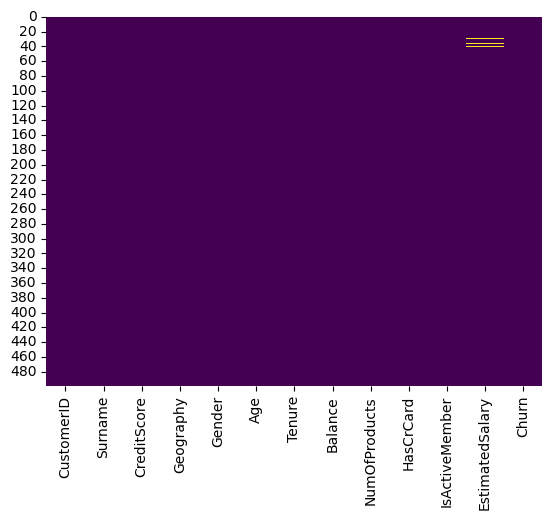

In [7]:
#visualize the missing values

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()


In [8]:
#imputing for missing values

data['EstimatedSalary'].fillna(data['EstimatedSalary'].median(), inplace=True)

In [9]:
#re-check for missing values

data.isnull().values.any()

data.isnull().sum()

CustomerID         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [10]:
#checking for data description

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    int64  
 1   Surname          500 non-null    object 
 2   CreditScore      500 non-null    int64  
 3   Geography        500 non-null    object 
 4   Gender           500 non-null    object 
 5   Age              500 non-null    int64  
 6   Tenure           500 non-null    int64  
 7   Balance          500 non-null    object 
 8   NumOfProducts    500 non-null    int64  
 9   HasCrCard        500 non-null    int64  
 10  IsActiveMember   500 non-null    int64  
 11  EstimatedSalary  500 non-null    float64
 12  Churn            500 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 50.9+ KB
None
       CustomerID  CreditScore         Age      Tenure  NumOfProducts  \
count  500.000000   500.000000  500.000000  500.000000     500.0

In [11]:
#Count churn and non-churn customers (Churn proportion)

data['Churn'].value_counts(normalize=True)

Churn
1    0.544
0    0.456
Name: proportion, dtype: float64

Approximately 55% of customers have churned, while 45% stayed. This proportion is alarming. The bank has lost more than half of its customers.

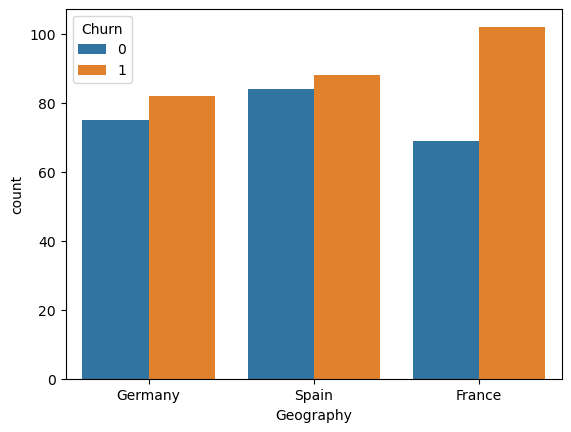

In [12]:
#plotting churn count by Geography

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Geography', hue='Churn', data=data)
plt.show()

Churned customers were leading in every location, but it was quite significant in France. It might sound funny though, there seems to be equilibrium in the forces pulling customers in and pulling them out. And this problem aggressively needs a solution.

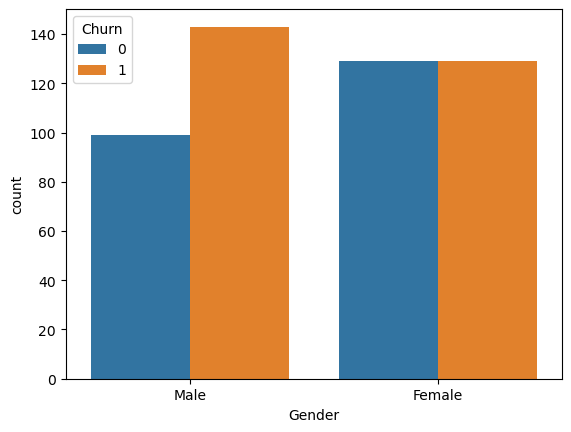

In [13]:
#plotting churn count by Gender

sns.countplot(x='Gender', hue='Churn', data=data)
plt.show()

The Female gender has equal churn and non-churn customer distribution. The male gender are leaving the bank faster than their female counterparts.

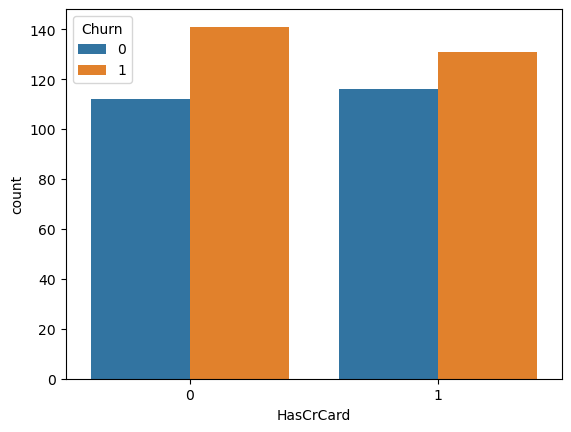

In [14]:
#plotting churn count by Credit Card

sns.countplot(x='HasCrCard', hue='Churn', data=data)
plt.show()

Those without credit cards are leaving more than those with credit cards

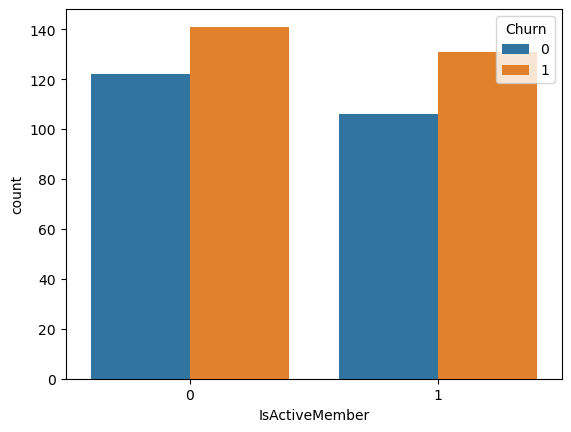

In [15]:
#plotting churn count by Active membership

sns.countplot(x='IsActiveMember', hue='Churn', data=data)
plt.show()

It seems active membership is synonymous to having a credit card. The graphs look the same.

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    int64  
 1   Surname          500 non-null    object 
 2   CreditScore      500 non-null    int64  
 3   Geography        500 non-null    object 
 4   Gender           500 non-null    object 
 5   Age              500 non-null    int64  
 6   Tenure           500 non-null    int64  
 7   Balance          500 non-null    object 
 8   NumOfProducts    500 non-null    int64  
 9   HasCrCard        500 non-null    int64  
 10  IsActiveMember   500 non-null    int64  
 11  EstimatedSalary  500 non-null    float64
 12  Churn            500 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 50.9+ KB
None


In [18]:
#dropping the customerID and surname column - they are not needed for the predictive model.

data.drop(['CustomerID', 'Surname'], axis=1, inplace=True)

In [19]:
#viewing my dataset 

print(data.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          764   Germany    Male   20       7  119274.87              3   
1          365     Spain  Female   64       3   203737.4              3   
2          519   Germany    Male   69       6   146780.5              3   
3          516   Germany  Female   59       0   23572.03              1   
4          659     Spain  Female   21       2    7463.43              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0          1               0        107886.77      0  
1          1               1         52848.11      0  
2          0               0         94395.02      0  
3          1               0        146739.55      0  
4          1               1         16036.55      0  


In [20]:
#generating one-hot encoding for 'geography' and 'gender' columns

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [21]:
print(data.head())

print("Available columns:", data.columns.tolist())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          764   20       7  119274.87              3          1   
1          365   64       3   203737.4              3          1   
2          519   69       6   146780.5              3          0   
3          516   59       0   23572.03              1          1   
4          659   21       2    7463.43              1          1   

   IsActiveMember  EstimatedSalary  Churn  Geography_Germany  Geography_Spain  \
0               0        107886.77      0               True            False   
1               1         52848.11      0              False             True   
2               0         94395.02      0               True            False   
3               0        146739.55      0               True            False   
4               1         16036.55      0              False             True   

   Gender_Male  
0         True  
1        False  
2         True  
3        False  
4        False  
Av

In [22]:
print(data.info())

#the balance data type supposed to be float and not object. Apparently, it contains characters that aren't numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Tenure             500 non-null    int64  
 3   Balance            500 non-null    object 
 4   NumOfProducts      500 non-null    int64  
 5   HasCrCard          500 non-null    int64  
 6   IsActiveMember     500 non-null    int64  
 7   EstimatedSalary    500 non-null    float64
 8   Churn              500 non-null    int64  
 9   Geography_Germany  500 non-null    bool   
 10  Geography_Spain    500 non-null    bool   
 11  Gender_Male        500 non-null    bool   
dtypes: bool(3), float64(1), int64(7), object(1)
memory usage: 36.8+ KB
None


In [23]:
#finding the rows with non-numeric values

# Convert Balance to numeric, invalid parsing will be NaN
balance_numeric = pd.to_numeric(data['Balance'], errors='coerce')

# Find rows where conversion failed (NaN values)
inconsistent_rows = data[balance_numeric.isna()]

print(inconsistent_rows)


    CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
68          450   80       4  XXXXXXXX              2          0   

    IsActiveMember  EstimatedSalary  Churn  Geography_Germany  \
68               0         10848.47      0              False   

    Geography_Spain  Gender_Male  
68             True         True  


In [24]:
#replacing the non-numeric value in Balance column with median value

# Convert 'Balance' to numeric; non-numeric entries become NaN
data['Balance'] = pd.to_numeric(data['Balance'], errors='coerce')

# Now 'xxxxxx' and other bad strings are NaN (missing values)

# Check how many bad/non-numeric values (now NaN) there are
print("Number of invalid/non-numeric entries in Balance:", data['Balance'].isna().sum())

# Impute those NaNs with the median of valid Balance values
median_balance = data['Balance'].median()
data['Balance'].fillna(median_balance, inplace=True)

# Confirm no more NaNs
print("Missing values in Balance after imputation:", data['Balance'].isna().sum())


Number of invalid/non-numeric entries in Balance: 1
Missing values in Balance after imputation: 0


In [26]:
#using standard scaler to scale the columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [28]:
#viewing my data to see if it has been properly scaled

print(data.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     1.254328 -1.572331  0.571263 -0.126838       0.472872          1   
1    -1.645575  0.452682 -0.670613  1.049054       0.472872          1   
2    -0.526314  0.682798  0.260794  0.256097       0.472872          0   
3    -0.548118  0.222567 -1.602021 -1.459219      -1.325122          1   
4     0.491195 -1.526308 -0.981083 -1.683484      -1.325122          1   

   IsActiveMember  EstimatedSalary  Churn  Geography_Germany  Geography_Spain  \
0               0         0.629760      0               True            False   
1               1        -0.713784      0              False             True   
2               0         0.300414      0               True            False   
3               0         1.578192      0               True            False   
4               1        -1.612387      0              False             True   

   Gender_Male  
0         True  
1        False  
2         True  


In [30]:
#splitting the data into test and training sets. 20% is reserved for testing while 80% is reserved for training.

from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#building model - RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[16 31]
 [27 26]]
              precision    recall  f1-score   support

           0       0.37      0.34      0.36        47
           1       0.46      0.49      0.47        53

    accuracy                           0.42       100
   macro avg       0.41      0.42      0.41       100
weighted avg       0.42      0.42      0.42       100

Accuracy: 0.42


In [35]:
#setting up Logistic Regression Model


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy:", accuracy_score(y_test, y_pred_log))


Confusion Matrix:
[[22 25]
 [22 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        47
           1       0.55      0.58      0.57        53

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100

Accuracy: 0.53


In [37]:
!pip install xgboost

In [39]:
#importing xgboostclassifier and building model

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Confusion Matrix:
[[18 29]
 [32 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        47
           1       0.42      0.40      0.41        53

    accuracy                           0.39       100
   macro avg       0.39      0.39      0.39       100
weighted avg       0.39      0.39      0.39       100

Accuracy: 0.39


C:\Users\aleji\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
#it's expected that XGBoost performed better than logistic regression and random forest. it's poor performance is pointing to something wrong about the data

#trying to check the distribution of the churned and non-churned customers

data['Churn'].value_counts()

Churn
1    272
0    228
Name: count, dtype: int64

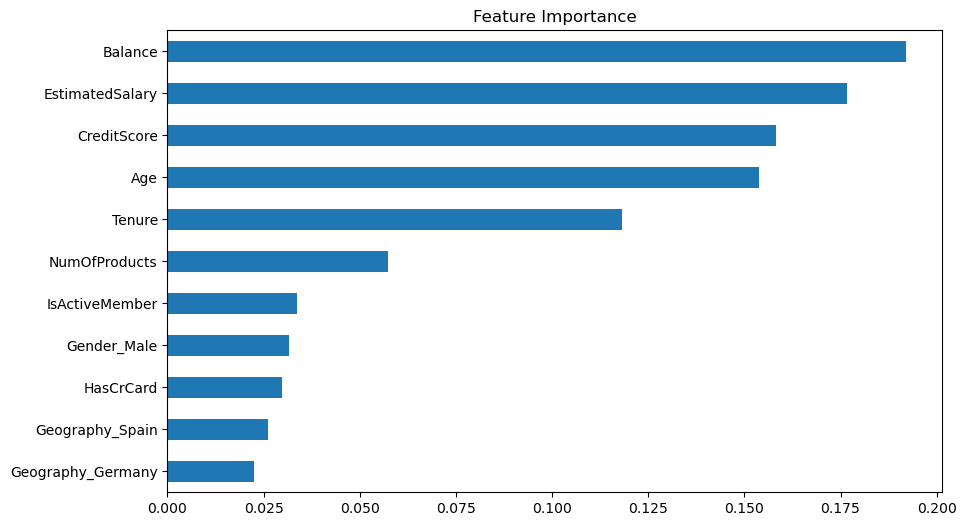

In [43]:
#plotting feature importance based on the randomforest classification..

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


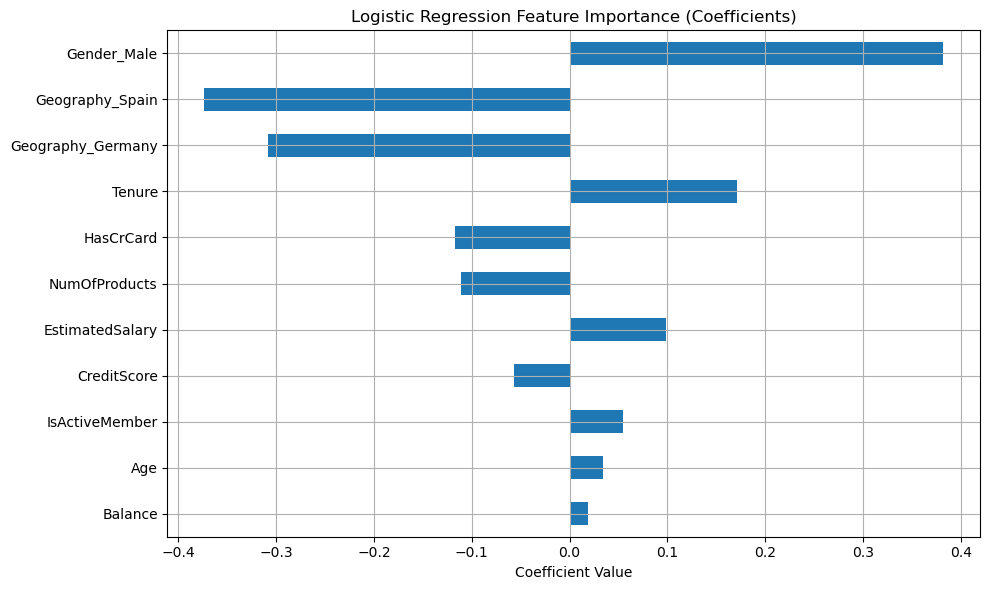

In [45]:
#plotting feature importance based on the logistic regression model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fit logistic regression again if needed
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
coefficients = pd.Series(log_model.coef_[0], index=X.columns)

# Sort by absolute value to see strongest effects
coefficients_sorted = coefficients.reindex(coefficients.abs().sort_values().index)

# Plot
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh')
plt.title("Logistic Regression Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

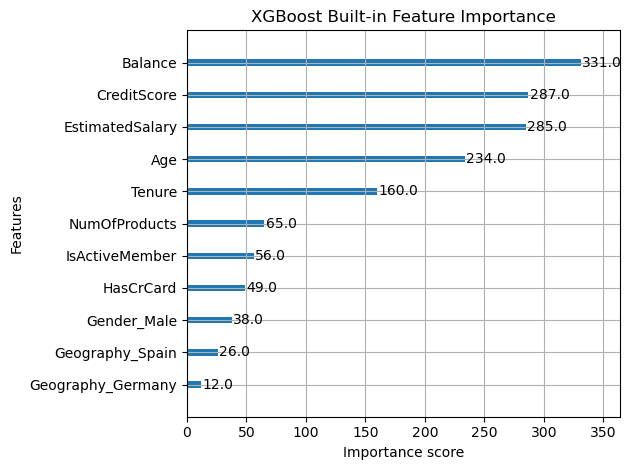

In [47]:
#visualizing XGBoost feature importance

from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # or 'gain', 'cover'
plt.title("XGBoost Built-in Feature Importance")
plt.tight_layout()
plt.show()


In [49]:
#decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[24 23]
 [28 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.51      0.48        47
           1       0.52      0.47      0.50        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100

Accuracy: 0.49


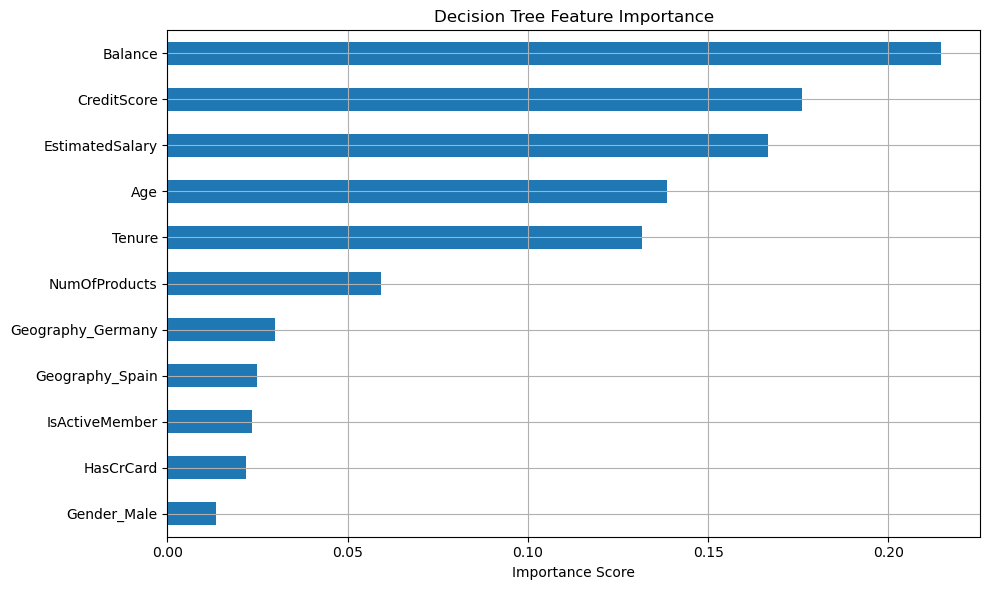

In [54]:
#visualize the decision tree model

# Get feature importances from the trained decision tree
dt_importances = pd.Series(dt_model.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(10, 6))
dt_importances.sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
#rebuilding the models by dropping the irrelevant features... retaining only Balance, CreditScore, EstimatedSalary, Age, and Tenure

# List of selected top features
selected_features = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure']

# Create new X with only the selected features
X = data[selected_features]

# Target variable remains the same
y = data['Churn']

# Train-test split again (since X has changed)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
#New logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression
[[10 37]
 [15 38]]
              precision    recall  f1-score   support

           0       0.40      0.21      0.28        47
           1       0.51      0.72      0.59        53

    accuracy                           0.48       100
   macro avg       0.45      0.46      0.44       100
weighted avg       0.46      0.48      0.45       100

Accuracy: 0.48


In [60]:
#New Random Forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest
[[20 27]
 [28 25]]
              precision    recall  f1-score   support

           0       0.42      0.43      0.42        47
           1       0.48      0.47      0.48        53

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.45       100

Accuracy: 0.45


In [62]:
#new XGBoost model

from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))



XGBoost
[[16 31]
 [30 23]]
              precision    recall  f1-score   support

           0       0.35      0.34      0.34        47
           1       0.43      0.43      0.43        53

    accuracy                           0.39       100
   macro avg       0.39      0.39      0.39       100
weighted avg       0.39      0.39      0.39       100

Accuracy: 0.39


In [64]:
#K-Nearest Neighbour model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# KNN is sensitive to scale, so we scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nK-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



K-Nearest Neighbors
[[24 23]
 [27 26]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        47
           1       0.53      0.49      0.51        53

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100

Accuracy: 0.5


In [65]:
#Support Vector Machine Model 


from sklearn.svm import SVC

# SVM also needs scaling
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSupport Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine
[[11 36]
 [22 31]]
              precision    recall  f1-score   support

           0       0.33      0.23      0.28        47
           1       0.46      0.58      0.52        53

    accuracy                           0.42       100
   macro avg       0.40      0.41      0.40       100
weighted avg       0.40      0.42      0.40       100

Accuracy: 0.42


It seems there is no much improvements on the models despite dropping some of the weak and irrelevant features